In [1]:
import nltk
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import metrics
import seaborn as sns
from wordcloud import WordCloud
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB, GaussianNB
from sklearn.feature_extraction.text import CountVectorizer
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
import string

In [3]:
df = pd.read_csv("Spam Email Detection - spam.csv")
df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [6]:
df.drop(columns = ["Unnamed: 2", "Unnamed: 3", "Unnamed: 4"], inplace = True)
df.sample(2)

,v1,v2
3380,spam,"complimentary 4 STAR Ibiza Holiday or �10,000 ..."
5155,ham,MY NEW YEARS EVE WAS OK. I WENT TO A PARTY WIT...


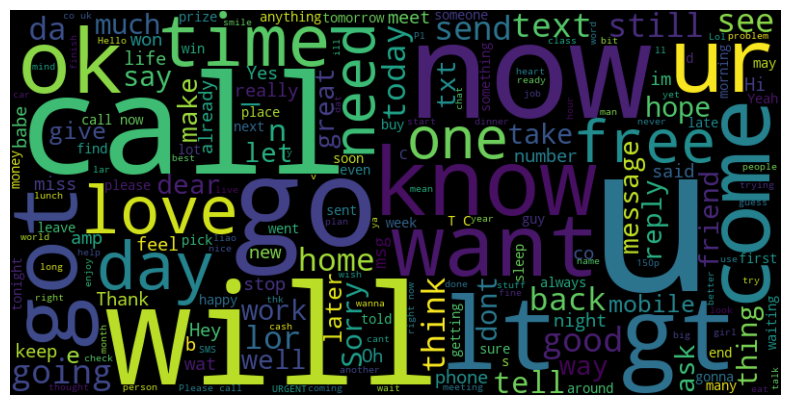

In [8]:
wordcloud = WordCloud(background_color='black', width=800, height=400).generate(''.join(df.v2))

plt.figure(figsize=(20, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [9]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

In [10]:
df["v1"] = encoder.fit_transform(df["v1"])
df.sample(2)

,v1,v2
2803,0,Lil fever:) now fine:)
4143,0,That's a shame! Maybe cld meet for few hrs tomo?


In [11]:
df.isnull().sum()

v1    0
v2    0
dtype: int64

In [12]:
df.duplicated().sum()

409

In [13]:
df = df.drop_duplicates(keep="first")
df.shape

(5163, 2)

In [14]:
df["v1"].value_counts()

0    4516
1     647
Name: v1, dtype: int64

([<matplotlib.patches.Wedge at 0x2180417dff0>,
 [Text(-1.0158507947047788, 0.42195635188686254, 'ham'),
  Text(1.0158508342111792, -0.4219562567760448, 'spam')],
 [Text(-0.5541004334753338, 0.23015801012010678, '87.469'),
  Text(0.5541004550242795, -0.23015795824147897, '12.531')])

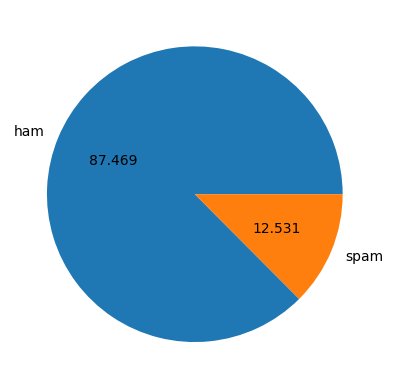

In [15]:
import matplotlib.pyplot as plt
plt.pie(df["v1"].value_counts(), labels=["ham","spam"],autopct="%0.3f")

In [16]:
df["num_characters"] = df["v2"].apply(len)
df.sample(3)

,v1,v2,num_characters
1535,1,You have won a Nokia 7250i. This is what you g...,150
2871,0,See you there!,14
1425,0,I'll be at mu in like &lt;#&gt; seconds,41


In [17]:
df["num_words"] = df["v2"].apply(lambda x:len(nltk.word_tokenize(x)))
df.sample(3)

,v1,v2,num_characters,num_words
1981,0,"Sorry, I'll call later in meeting any thing re...",89,24
3271,0,"MOON has come to color your dreams, STARS to m...",121,26
4104,0,Jus finish my lunch on my way home lor... I to...,80,21


In [18]:
df["num_sentences"] = df["v2"].apply(lambda x:len(nltk.sent_tokenize(x)))
df.sample(3)

,v1,v2,num_characters,num_words,num_sentences
1756,0,Lmao ok I wont be needing u to do my hair anym...,50,13,1
2846,1,Free-message: Jamster!Get the crazy frog sound...,157,38,5
1381,0,We spend our days waiting for the ideal path t...,155,37,2


In [19]:
df[["num_characters","num_words","num_sentences"]].describe()

,num_characters,num_words,num_sentences
count,5163.000000,5163.000000,5163.000000
mean,78.811156,18.444122,1.963974
std,58.153491,13.327940,1.448008
min,2.000000,1.000000,1.000000
25%,36.000000,9.000000,1.000000
50%,60.000000,15.000000,1.000000
75%,116.000000,26.000000,2.000000
max,910.000000,220.000000,38.000000


In [20]:
df[df["v1"] == 0][["num_characters","num_words","num_sentences"]].describe()

,num_characters,num_words,num_sentences
count,4516.000000,4516.000000,4516.000000
mean,70.428919,17.123782,1.820195
std,56.356310,13.493970,1.383657
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,1.000000
50%,52.000000,13.000000,1.000000
75%,90.000000,22.000000,2.000000
max,910.000000,220.000000,38.000000


In [21]:
df[df["v1"] == 1][["num_characters","num_words","num_sentences"]].describe()

,num_characters,num_words,num_sentences
count,647.000000,647.000000,647.000000
mean,137.318393,27.659969,2.967543
std,30.096861,7.038065,1.490069
min,13.000000,2.000000,1.000000
25%,130.000000,25.000000,2.000000
50%,148.000000,29.000000,3.000000
75%,157.000000,32.000000,4.000000
max,223.000000,46.000000,9.000000


<AxesSubplot: xlabel='num_characters', ylabel='Count'>

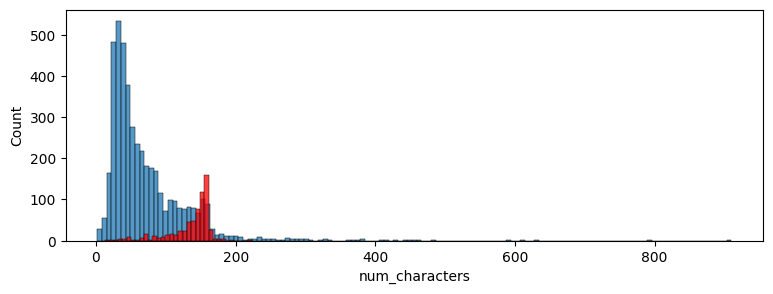

In [22]:
plt.figure(figsize=(9,3))
sns.histplot(df[df["v1"] == 0]["num_characters"])
sns.histplot(df[df["v1"] == 1]["num_characters"],color="red")

<AxesSubplot: xlabel='num_words', ylabel='Count'>

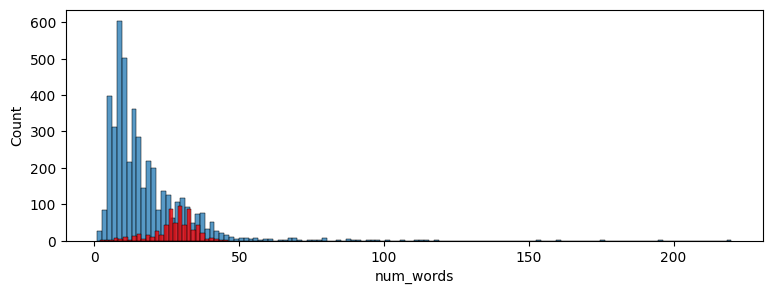

In [23]:
plt.figure(figsize=(9,3))
sns.histplot(df[df["v1"] == 0]["num_words"])
sns.histplot(df[df["v1"] == 1]["num_words"],color="red")

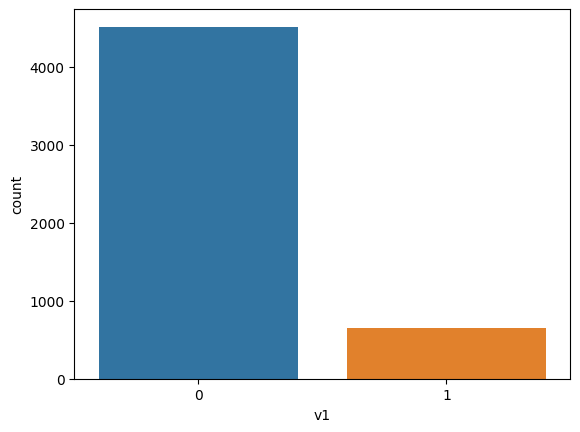

In [33]:
sns.countplot(x='v1', data=df)
plt.show()

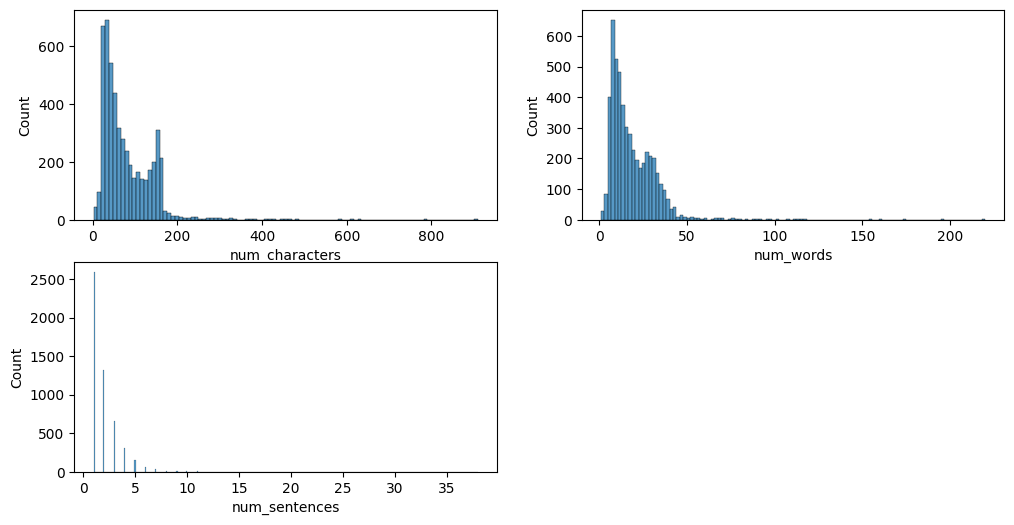

In [34]:
plt.figure(figsize=(12, 6))
plt.subplot(2, 2, 1)
sns.histplot(df['num_characters'])
plt.subplot(2, 2, 2)
sns.histplot(df['num_words'])
plt.subplot(2, 2, 3)
sns.histplot(df['num_sentences'])
plt.show()

In [35]:
from sklearn.feature_extraction.text import CountVectorizer
import pandas as pd

text = ['Hello my name is james', 'james this is my python notebook', 'james trying to create a big dataset', 'james of words to try differnt', 'features of count vectorizer']

vectorizer = CountVectorizer(stop_words='english')

count_matrix = vectorizer.fit_transform(text)

count_array = count_matrix.toarray()

df1 = pd.DataFrame(data=count_array, columns=vectorizer.get_feature_names_out())

df1

,big,count,create,dataset,differnt,features,hello,james,notebook,python,try,trying,vectorizer,words
0,0,0,0,0,0,0,1,1,0,0,0,0,0,0
1,0,0,0,0,0,0,0,1,1,1,0,0,0,0
2,1,0,1,1,0,0,0,1,0,0,0,1,0,0
3,0,0,0,0,1,0,0,1,0,0,1,0,0,1
4,0,1,0,0,0,1,0,0,0,0,0,0,1,0


In [36]:
X = vectorizer.fit_transform(df["v2"])

y = df["v1"]

# Split the data into train and test sets

X_train, X_test, y_train, y_test = train_test_split(X.toarray(), y, test_size=0.3, random_state=0)

In [37]:
clf = GaussianNB()

clf.fit(X_train, y_train)

clf.score(X_test, y_test)

0.8902517753389283

In [38]:
def predict_spam(input_text):
    text_vectorized = vectorizer.transform([input_text])
    prediction = clf.predict(text_vectorized.toarray())[0]
    return "Spam" if prediction == 1 else "Not Spam"

In [42]:
import gradio as gr

# Gradio Interface
iface = gr.Interface(
    fn=predict_spam,
    inputs=gr.Textbox(),
    outputs=gr.Textbox(),
    live=True,
    title="Spam Classifier",
    description="Enter an email text to check if it's spam or not."
)

iface.launch()

Running on local URL:  http://127.0.0.1:7860

To create a public link, set `share=True` in `launch()`.
